## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 40s 0us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0801 19:57:22.418369 10856 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0801 19:57:23.690889 10856 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0801 19:57:40.956608 10856 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.9220 - acc: 0.3087 - val_loss: 1.7387 - val_acc: 0.3829
Epoch 2/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.6997 - acc: 0.3921 - val_loss: 1.7292 - val_acc: 0.3906
Epoch 3/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6120 - acc: 0.4252 - val_loss: 1.6153 - val_acc: 0.4276
Epoch 4/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5412 - acc: 0.4497 - val_loss: 1.5272 - val_acc: 0.4524
Epoch 5/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.4983 - acc: 0.4626 - val_loss: 1.4972 - val_acc: 0.4671
Epoch 6/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.4608 - acc: 0.4801 - val_loss: 1.5066 - val_acc: 0.4619
Epoch 7/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.4254 - acc: 0.4910 - val_loss: 1.

50000/50000 [==============================] - 5s 107us/step - loss: 0.5420 - acc: 0.8072 - val_loss: 2.0497 - val_acc: 0.5161
Epoch 60/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.5106 - acc: 0.8171 - val_loss: 1.9963 - val_acc: 0.5152
Epoch 61/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5010 - acc: 0.8227 - val_loss: 2.0938 - val_acc: 0.5143
Epoch 62/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.4976 - acc: 0.8210 - val_loss: 2.1269 - val_acc: 0.5128
Epoch 63/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.4802 - acc: 0.8268 - val_loss: 2.1429 - val_acc: 0.5114
Epoch 64/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.4904 - acc: 0.8253 - val_loss: 2.1894 - val_acc: 0.5111
Epoch 65/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.4854 - acc: 0.8264 - val_loss: 2.1985 - val_acc: 0.5070
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 103us/step - loss: 0.2412 - acc: 0.9141 - val_loss: 3.5858 - val_acc: 0.4889
Epoch 118/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2338 - acc: 0.9166 - val_loss: 3.4808 - val_acc: 0.4964
Epoch 119/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2413 - acc: 0.9136 - val_loss: 3.4677 - val_acc: 0.5002
Epoch 120/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2433 - acc: 0.9115 - val_loss: 3.4931 - val_acc: 0.4955
Epoch 121/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.2701 - acc: 0.9028 - val_loss: 3.4357 - val_acc: 0.4982
Epoch 122/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2107 - acc: 0.9259 - val_loss: 3.4425 - val_acc: 0.5055
Epoch 123/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2003 - acc: 0.9278 - val_loss: 3.4986 - val_acc: 0.5017
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 0.1793 - acc: 0.9375 - val_loss: 4.1599 - val_acc: 0.4987
Epoch 176/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.1586 - acc: 0.9441 - val_loss: 4.2525 - val_acc: 0.4894
Epoch 177/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.2013 - acc: 0.9302 - val_loss: 4.1325 - val_acc: 0.5027
Epoch 178/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.1202 - acc: 0.9571 - val_loss: 4.2694 - val_acc: 0.4952
Epoch 179/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1459 - acc: 0.9486 - val_loss: 4.2507 - val_acc: 0.4954
Epoch 180/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.1420 - acc: 0.9506 - val_loss: 4.2889 - val_acc: 0.4921
Epoch 181/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2426 - acc: 0.9177 - val_loss: 4.2270 - val_acc: 0.4932
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 0.1314 - acc: 0.9548 - val_loss: 4.6253 - val_acc: 0.4927
Epoch 234/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1373 - acc: 0.9533 - val_loss: 4.6245 - val_acc: 0.4956
Epoch 235/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1560 - acc: 0.9474 - val_loss: 4.6301 - val_acc: 0.4926
Epoch 236/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1570 - acc: 0.9480 - val_loss: 4.7228 - val_acc: 0.4908
Epoch 237/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0910 - acc: 0.9683 - val_loss: 4.5898 - val_acc: 0.4939
Epoch 238/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0930 - acc: 0.9675 - val_loss: 4.6277 - val_acc: 0.4945
Epoch 239/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1317 - acc: 0.9539 - val_loss: 4.6871 - val_acc: 0.4897
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 0.0999 - acc: 0.9662 - val_loss: 4.8496 - val_acc: 0.4952
Epoch 292/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.1644 - acc: 0.9471 - val_loss: 4.8326 - val_acc: 0.4871
Epoch 293/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.1089 - acc: 0.9638 - val_loss: 4.8683 - val_acc: 0.4902
Epoch 294/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0857 - acc: 0.9703 - val_loss: 4.9176 - val_acc: 0.4899
Epoch 295/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0895 - acc: 0.9697 - val_loss: 4.8487 - val_acc: 0.4899
Epoch 296/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0766 - acc: 0.9744 - val_loss: 4.9039 - val_acc: 0.4900
Epoch 297/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1022 - acc: 0.9658 - val_loss: 4.9198 - val_acc: 0.4877
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 0.1337 - acc: 0.9572 - val_loss: 5.1625 - val_acc: 0.4871
Epoch 350/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1219 - acc: 0.9612 - val_loss: 4.9952 - val_acc: 0.4893
Epoch 351/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1018 - acc: 0.9667 - val_loss: 5.0559 - val_acc: 0.4919
Epoch 352/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0713 - acc: 0.9759 - val_loss: 5.0461 - val_acc: 0.4915
Epoch 353/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 4.9782 - val_acc: 0.4983
Epoch 354/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0506 - acc: 0.9827 - val_loss: 5.1066 - val_acc: 0.4875
Epoch 355/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1976 - acc: 0.9416 - val_loss: 5.0511 - val_acc: 0.4720
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 9s 178us/step - loss: 0.1840 - acc: 0.9456 - val_loss: 5.1932 - val_acc: 0.4834
Epoch 408/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1038 - acc: 0.9670 - val_loss: 5.1342 - val_acc: 0.4909
Epoch 409/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0749 - acc: 0.9764 - val_loss: 5.1523 - val_acc: 0.4946
Epoch 410/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0256 - acc: 0.9923 - val_loss: 5.1979 - val_acc: 0.4932
Epoch 411/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0166 - acc: 0.9954 - val_loss: 5.2300 - val_acc: 0.4940
Epoch 412/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.0184 - acc: 0.9947 - val_loss: 5.2962 - val_acc: 0.4939
Epoch 413/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0354 - acc: 0.9882 - val_loss: 5.3484 - val_acc: 0.4907
Epoch 414/500
50000/50000

50000/50000 [==============================] - 5s 107us/step - loss: 0.0029 - acc: 0.9998 - val_loss: 5.2279 - val_acc: 0.4995
Epoch 466/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0037 - acc: 0.9994 - val_loss: 5.2688 - val_acc: 0.4979
Epoch 467/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.3517 - acc: 0.9199 - val_loss: 5.2478 - val_acc: 0.4718
Epoch 468/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.3213 - acc: 0.9154 - val_loss: 5.0594 - val_acc: 0.4888
Epoch 469/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0705 - acc: 0.9764 - val_loss: 5.0671 - val_acc: 0.4901
Epoch 470/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0203 - acc: 0.9944 - val_loss: 5.0458 - val_acc: 0.4941
Epoch 471/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0086 - acc: 0.9986 - val_loss: 5.0876 - val_acc: 0.4965
Epoch 472/500
50000/50000 [

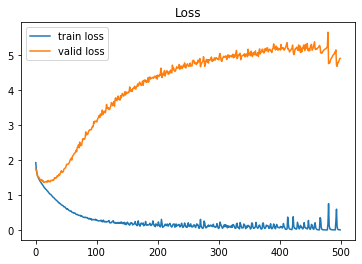

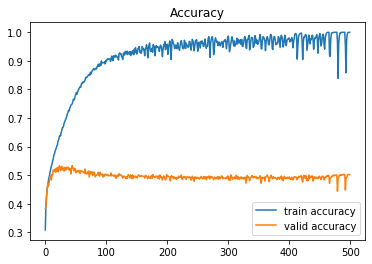

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
train, test = keras.datasets.cifar10.load_data()
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.2712 - acc: 0.1610 - val_loss: 2.2353 - val_acc: 0.1899
Epoch 2/100
50000/50000 [==============================] - 7s 135us/step - loss: 2.2108 - acc: 0.2070 - val_loss: 2.1872 - val_acc: 0.2280
Epoch 3/100
50000/50000 [==============================] - 7s 136us/step - loss: 2.1659 - acc: 0.2351 - val_loss: 2.1444 - val_acc: 0.2504
Epoch 4/100
50000/50000 [==============================] - 7s 135us/step - loss: 2.1261 - acc: 0.2533 - val_loss: 2.1064 - val_acc: 0.2657
Epoch 5/100
50000/50000 [==============================] - 7s 137us/step - loss: 2.0902 - acc: 0.2698 - val_loss: 2.0712 - val_acc: 0.2792
Epoch 6/100
50000/50000 [==============================] - 7s 136us/step - loss: 2.0571 - acc: 0.2847 - val_loss: 2.0390 - val_acc: 0.2899
Epoch 7/100
50000/50000 [==============================] - 7s 135us/step - loss: 2.0264 - acc: 0.2934 - val_loss: 2.

50000/50000 [==============================] - 7s 138us/step - loss: 1.6617 - acc: 0.4241 - val_loss: 1.6682 - val_acc: 0.4200
Epoch 60/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6587 - acc: 0.4254 - val_loss: 1.6667 - val_acc: 0.4180
Epoch 61/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6556 - acc: 0.4262 - val_loss: 1.6615 - val_acc: 0.4232
Epoch 62/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6522 - acc: 0.4271 - val_loss: 1.6625 - val_acc: 0.4269
Epoch 63/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.6496 - acc: 0.4276 - val_loss: 1.6593 - val_acc: 0.4232
Epoch 64/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.6466 - acc: 0.4280 - val_loss: 1.6544 - val_acc: 0.4270
Epoch 65/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.6436 - acc: 0.4308 - val_loss: 1.6512 - val_acc: 0.4279
Epoch 66/100
50000/50000 [=======

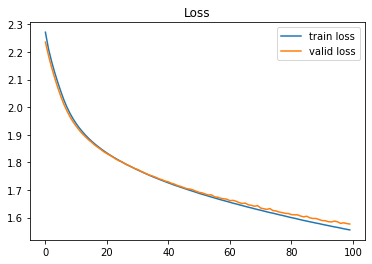

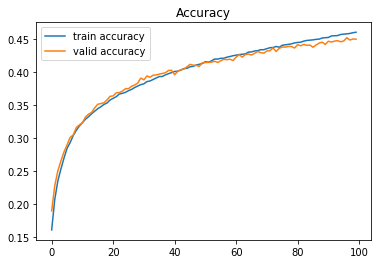

In [10]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()